# SQL
# EXPRESSÕES REGULARES - REGEX

Regex é a abreviação de _Regular Expression_ (Expressão Regular em português), trata-se de uma forma concisa e flexível de identificar cadeias de caracteres de interesse, como determinados caracteres, palavras ou padrões de caracteres.

As regex são amplamente utilizadas em programação, processamento de texto, análise de dados e em muitos outros contextos onde é necessário manipular e extrair informações de strings de texto de maneira eficiente.is

Veja a saída da _query_ a seguir:

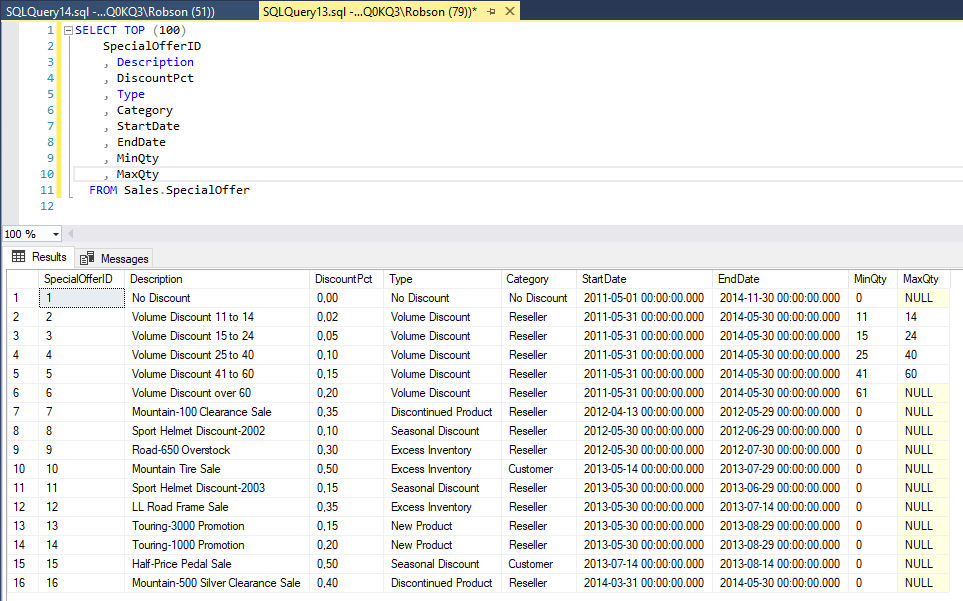

A coluna `Description` contém registros que seguem um padrão:

Há promoções que começam com "Volume" seguido por:

- um espaço
- uma cadeia de caracteres
- um espaço
- dois caracteres numéricos
- um espaço
- uma cadeia de caracteres
- um espaço
- dois caracteres numéricos

Pode-se usar de regex para buscar os registros que contém esses dados:

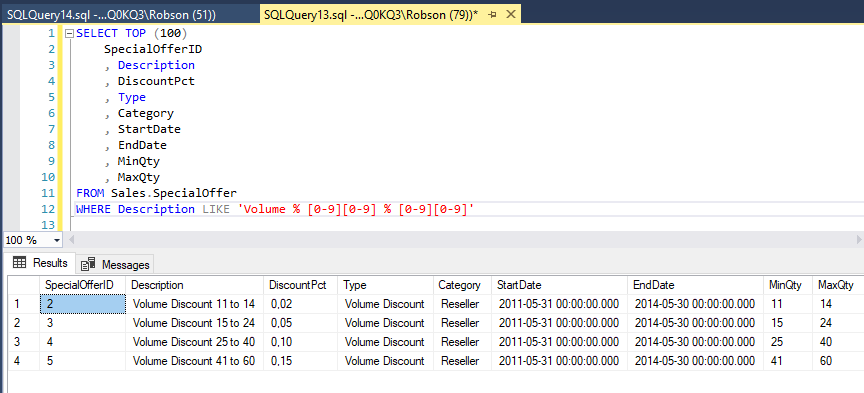

### FILTRAR DADOS COM ACENTUAÇÃO E CASE SENSITIVE

SQL é uma linguagem _case insensitive_, não faz distinção entre caracteres maiúsculos ou minúsculos. Ao filtrar o nome "Paula", se na tabela houver registros com "paula", "Paula" e "PAULA", a _query_ irá rertornar todos estes registros.

- **SQL Server**: No SQL Server, para filtros exatos com case sensitive, há a função `COLLATE<collation_name>`

Vamos tomar como exemplo os dados da tabela `dCliente`:

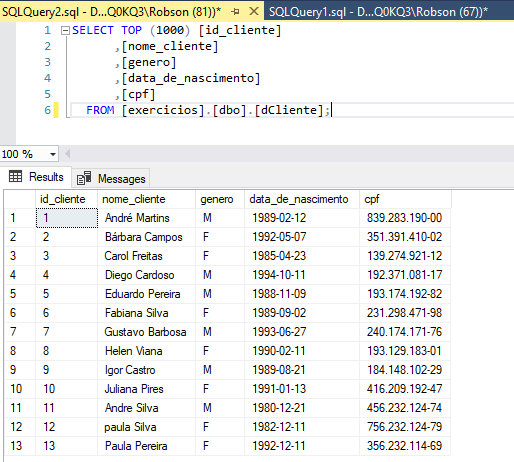

Ao filtar o atributo nome para retornar clientes que possuem o nome iniciando com `Paula`, o SQL retornará tanto os registros iniciando com letra miúscula quanto os com letra minúscula:

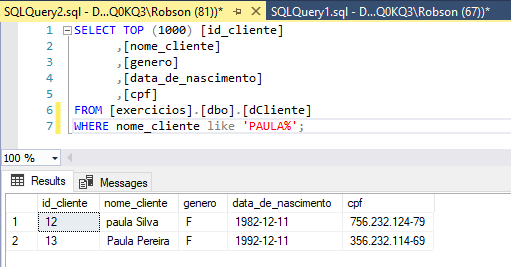

Para um filtro exato do nome que inicia com `Paula`, vamos fazer uso da função `COLLATE`:

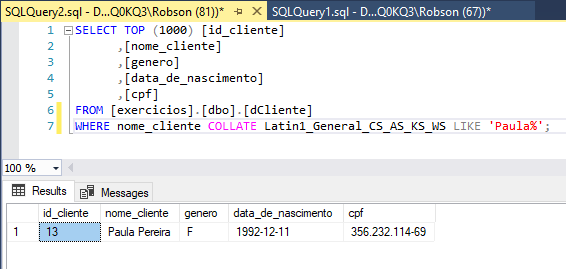

Filtrar nome que inicia com `paula`

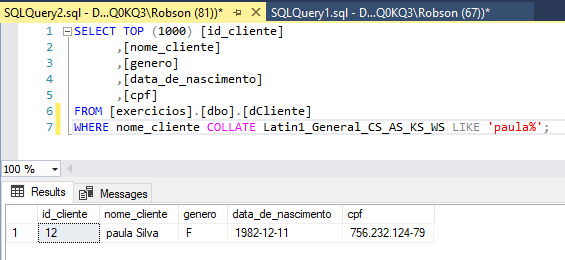

Outro exemplo é o filtro do nome `Andre`, na tabela há dois registros, um com acento na letra "e" e outro sem acento. Para ignorar a acentuação devemos usar a função `COLLATE`

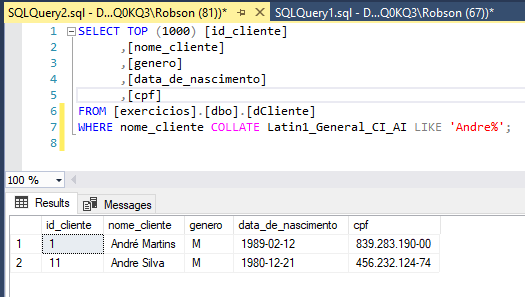

`Latin1_General_CI_AI` é o _collation_name_ que acompanha a função `COLLATE`, e é usado para definir a ordem de classificação (_collation_) que será usada por padrão na expressão. A parte `Latin1` representa a codificação de caracteres do idioma. `CI` significa _case insensitive_ e `AI` _accent insensitive_.

Uma aplicação do uso desta função seria buscar por nomes científicos que foram erroneamente registros em uma tabela. Os nomes científicos possuem uma regra taxonômica que define o gênero iniciando com letra maiúsculo e o restante do nome em letras minúsculas, grafados em itálico; por exemplo: o nome científico da árvore cedro é _Cedrela odorata_, Cedrela é o gênero botânico e odorata o epíteto específico que define a espécie.

Para retornar todos os nomes que iniciam com um caractere minúsculo em **SQL Server**, você pode usar a função `COLLATE` para comparar os caracteres de forma case-sensitive buscar inconsistência em nomes cientícos em uma tabela. Aqui está uma query que faz isso:

In [ ]:
SELECT nome_cientifico
FROM sua_tabela
WHERE nome_cientifico COLLATE Latin1_General_BIN LIKE '[a-z]%'

**Explicação**:

- **nome_cientifico COLLATE Latin1_General_BIN**: Esta cláusula força a comparação a ser binária, o que diferencia maiúsculas de minúsculas.
- **LIKE '% [a-z]%': A expressão % [a-z]%** procura por um espaço seguido de uma letra minúscula, garantindo que estamos verificando a segunda parte do nome científico.

A função `COLLATION` é utilizada na instalação do SQL Server, onde o padrão é `COLLATE Latin1_General_CI_AS`. Para confirmar o padrão instalado:

In [ ]:
SELECT SERVERPROPERTY('COLLATION');

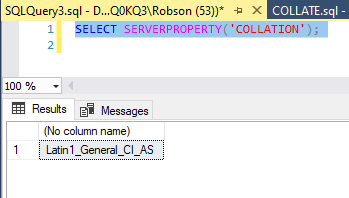

**COLLATION NA CRIAÇÃO DE BANCO DE DADOS**

A função `COLLATE` no SQL Server pode ser usada na criação de um banco de dados para definir a ordem de classificação (_collation_) que será usada por padrão para todas as colunas de texto do banco de dados.

Veja o exemplo de criação de um banco de dados chamado `BiodiversityDB` com a _collation_ `Latin1_General_BIN`, que é uma _collation_ binária que diferencia entre maiúsculas e minúsculas.

In [ ]:
CREATE DATABASE BiodiversityDB
COLLATE Latin1_General_BIN;


**Explicação**:

- **CREATE DATABASE BiodiversityDB**: Cria um novo banco de dados chamado `BiodiversityDB`.
- **COLLATE Latin1_General_BIN**: Define a collation do banco de dados para `Latin1_General_BIN`, que é case-sensitive e binary (binária).

**Usando a Collation na Criação de Tabelas**

Você também pode especificar uma collation diferente para colunas específicas ao criar uma tabela, mesmo que a collation do banco de dados seja diferente. Aqui está um exemplo:

In [ ]:
USE BiodiversityDB;

CREATE TABLE Especies (
    ID INT PRIMARY KEY,
    NomeCientifico NVARCHAR(255) COLLATE Latin1_General_BIN NOT NULL,
    NomeComum NVARCHAR(255) COLLATE Latin1_General_CI_AS
);


**Explicação**:

- **USE BiodiversityDB**: Define o banco de dados atual para `BiodiversityDB`.
- **CREATE TABLE Especies**: Cria uma tabela chamada `Especies`.
- **NomeCientifico NVARCHAR(255) COLLATE Latin1_General_BIN**: Define a coluna `NomeCientifico` com a `collation Latin1_General_BIN`, que é case-sensitive.
- **NomeComum NVARCHAR(255) COLLATE Latin1_General_CI_AS**: Define a coluna `NomeComum` com a collation `Latin1_General_CI_AS`, que é case-insensitive.

**Alter a collation de uma Base de Dados**

In [ ]:
ALTER DATABASE <data_base_name> COLLATE <collation_name>;

**OBTER A COLLATION DE UMA BASE DE DADOS ESPECÍFICA**

In [ ]:
SELECT DATABASEPROPERTYEX('BiodiversityDB', 'Collation');

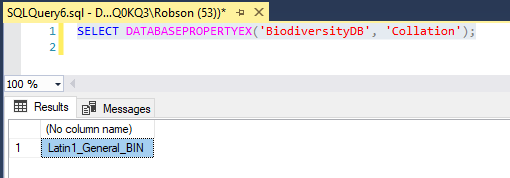

### CASE SENSITIVE COM USO DO PREDICADO LIKE

A query a seguir é de uma tabela em que o atributo `Nome` foi definido com `COLLATE Latin1_General_CS_AS`

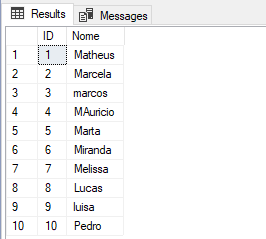

Imagine que você precisa filtar todos os nomes que inciam com os caracteres "mar", mas ignorando o _case sensitive_ que foi definido para a tabela. Você poderia usar `
WHERE Nome LIKE 'mar%' OR Nome LIKE 'Mar%`, porém há uma maneira mais prática de realizar a _query_.';

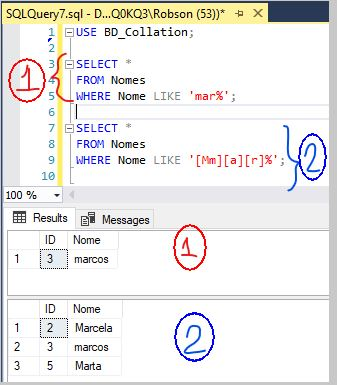

- Retornar as linhas onde a primeira letra seja 'M' ou 'm', e a segunda seja 'A' ou 'a'

In [ ]:
-- Retornar as linhas onde a primeira letra seja 'M' ou 'm', e a segunda seja 'A' ou 'a'
SELECT *
FROM Nomes
WHERE Nome LIKE '[Mm][Aa]%'

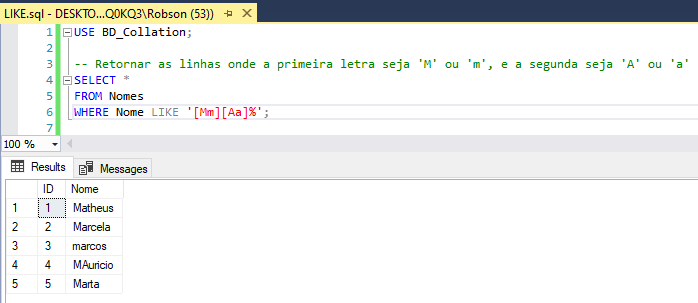

- Retornar nomes que começam com a letra 'M', 'E' ou 'K' a partir da tabela `Textos`

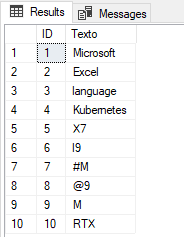

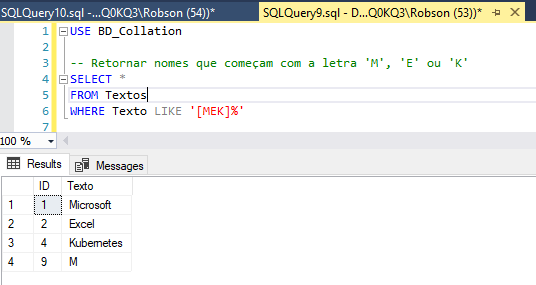

- Retornar nomes que apresentam apenas um caractere

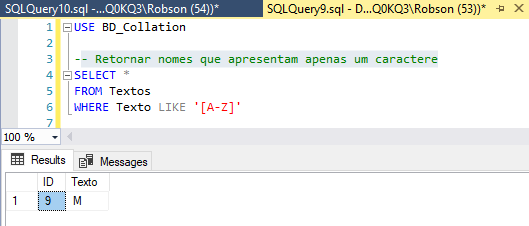

- Retornar nomes que apresentam apenas dois caracteres

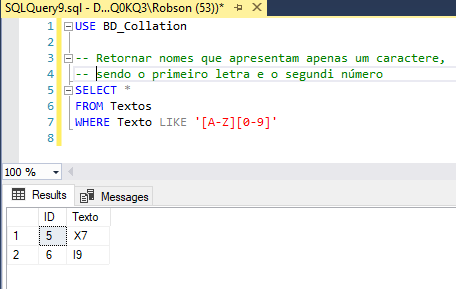

#### USO DO LIKE COM O CARACTERE CURINGA `_`

- Filtrar os nomes que contenham a aberviação "Mr.", ignorando letras maicúslas e minúsculas:

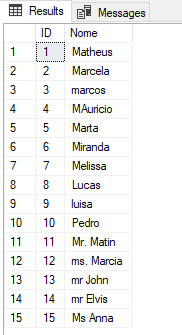

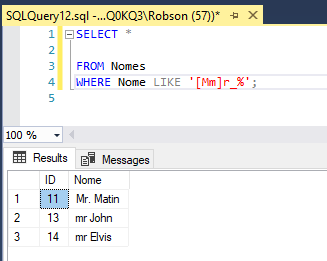

### NOT LIKE

- Filtrar os nomes que NÃO contenham a aberviação "Mr.", ignorando letras maicúslas e minúsculas:

In [ ]:
SELECT *
FROM Nomes
WHERE Nome NOT LIKE '[Mm]r_%';

### IDENTIFICAR CARACTERES ESPECIAIS

In [ ]:
SELECT *

FROM Textos
WHERE Texto LIKE '%[^A-Z0-9]%';

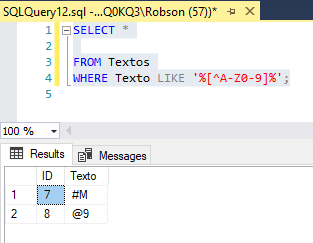

### FILTRAR NÚMEROS

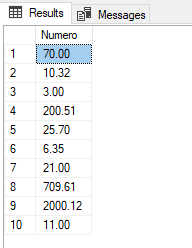

- Filtrar números que possuam 2 dígitos na parte inteira

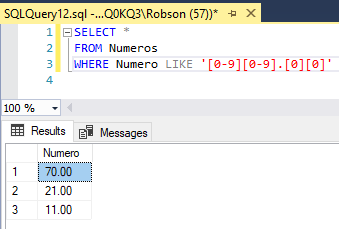

- Todos os números que terminam em .00

In [ ]:
SELECT *
FROM Numeros
WHERE Numero LIKE '%.[0][0]'

- Filtrar os registros que:
    - 1. Possuem 3 dígitos na parte inteira, sendo o primeiro dígito igual a 7
    - 2. O primeiro número da parte decimal seja 6
    - 3. O segundo número da parte decimal seja um número entre 0 e 9.

In [ ]:
SELECT *
FROM Numeros
WHERE Numero LIKE '[7]__.[6][0-9]'

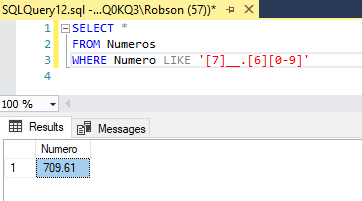